 QuTiP example: Wigner function animation for the dynamics of the Jaynes-Cumming model

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

In [5]:
from qutip import *
from qutip.ipynbtools import plot_animation

In [6]:
def jc_integrate(N, wc, wa, g, kappa, gamma, psi0, use_rwa, tlist):

    # Hamiltonian
    idc = qeye(N)
    ida = qeye(2)

    a  = tensor(destroy(N), ida)
    sm = tensor(idc, destroy(2))

    if use_rwa: 
        # use the rotating wave approxiation
        H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
    else:
        H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())
        
    # collapse operators
    c_op_list = []

    n_th_a = 0.0 # zero temperature

    rate = kappa * (1 + n_th_a)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a)

    rate = kappa * n_th_a
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a.dag())

    rate = gamma
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)

    # evolve and calculate return state vectors
    result = mesolve(H, psi0, tlist, c_op_list, [])  

    return result

In [7]:
# parameters
wc = 1.0 * 2 * np.pi   # cavity frequency
wa = 1.0 * 2 * np.pi   # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.05        # cavity dissipation rate
gamma = 0.15        # atom dissipation rate
N = 10              # number of cavity fock states

use_rwa = True

# initial state
psi0 = tensor(basis(N,0), basis(2,1))  # start with an excited atom 
#psi0 = tensor(coherent(N,1.5), basis(2,0))  # or a coherent state the in cavity
#psi0 = tensor((coherent(N,2.0)+coherent(N,-2.0)).unit(), basis(2,0))  # or a superposition of coherent states

tlist = np.linspace(0, 30, 150)

In [8]:
result = jc_integrate(N, wc, wa, g, kappa, gamma, psi0, use_rwa, tlist)

In [9]:
xvec = np.linspace(-5.,5.,100)
X,Y = np.meshgrid(xvec, xvec)

In [10]:
def plot_setup(result):    
    
    fig = plt.figure(figsize=(12, 6))
    ax = Axes3D(fig, azim=-107, elev=49)

    return fig, ax

In [11]:
cb = None

def plot_result(result, n, fig=None, axes=None):
    
    global cb
    
    if fig is None or axes is None:
        fig, ax = plot_setup(result)
        
    axes.cla()

    # trace out the atom
    rho_cavity = ptrace(result.states[n], 0)

    W = wigner(rho_cavity, xvec, xvec)
    
    surf = axes.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet,
                           alpha=1.0, linewidth=0.05, vmax=0.25, vmin=-0.25)
    axes.set_xlim3d(-5, 5)
    axes.set_ylim3d(-5, 5)
    axes.set_zlim3d(-0.25, 0.25)
    
    if not cb:
        cb = plt.colorbar(surf, shrink=0.65, aspect=20)

    return fig, axes

ValueError: unknown file extension: .mp4

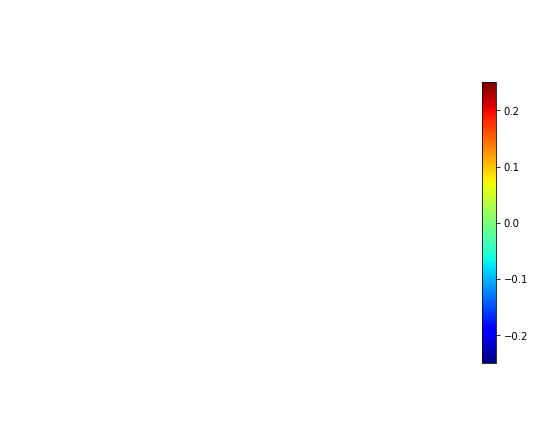

In [12]:
plot_animation(plot_setup, plot_result, result)

# Versions

In [ ]:
from qutip.ipynbtools import version_table

version_table()